In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from erftools.postprocessing import Plotfile

plt.rcParams['font.family'] = 'serif'

In [2]:
fld = 'theta'

In [3]:
pf = Plotfile('COMP_FINE/plt03600')
ref = pf.to_xarray(fields=[fld],verbose=True)

Reading theta (staggered dim: None)
  0 BoxlibGrid_0000 ([256   1 256]) [0. 0. 0.] [6400.  100. 6400.] level 0
  1 BoxlibGrid_0001 ([256   1 256]) [6400.    0.    0.] [12800.   100.  6400.] level 0
  2 BoxlibGrid_0002 ([256   1 256]) [12800.     0.     0.] [19200.   100.  6400.] level 0
  3 BoxlibGrid_0003 ([256   1 256]) [19200.     0.     0.] [25600.   100.  6400.] level 0


In [4]:
pf = Plotfile('ANEL_FINE/plt03600')
ref_anel = pf.to_xarray(fields=[fld],verbose=True)

Reading theta (staggered dim: None)
  0 BoxlibGrid_0000 ([256   1 256]) [0. 0. 0.] [6400.  100. 6400.] level 0
  1 BoxlibGrid_0001 ([256   1 256]) [6400.    0.    0.] [12800.   100.  6400.] level 0
  2 BoxlibGrid_0002 ([256   1 256]) [12800.     0.     0.] [19200.   100.  6400.] level 0
  3 BoxlibGrid_0003 ([256   1 256]) [19200.     0.     0.] [25600.   100.  6400.] level 0


In [5]:
pf = Plotfile('COMP_FAC4/plt00900')
fac4_comp = pf.to_xarray(fields=[fld],verbose=True)

Reading theta (staggered dim: None)
  0 BoxlibGrid_0000 ([64  1 64]) [0. 0. 0.] [6400.  100. 6400.] level 0
  1 BoxlibGrid_0001 ([64  1 64]) [6400.    0.    0.] [12800.   100.  6400.] level 0
  2 BoxlibGrid_0002 ([64  1 64]) [12800.     0.     0.] [19200.   100.  6400.] level 0
  3 BoxlibGrid_0003 ([64  1 64]) [19200.     0.     0.] [25600.   100.  6400.] level 0
  4 BoxlibGrid_0004 ([128   1  36]) [0. 0. 0.] [3200.  100.  900.] level 1
  5 BoxlibGrid_0005 ([112   1  36]) [3200.    0.    0.] [6000.  100.  900.] level 1
  6 BoxlibGrid_0006 ([112   1 116]) [6000.    0.    0.] [8800.  100. 2900.] level 1
  7 BoxlibGrid_0007 ([ 96   1 116]) [8800.    0.    0.] [11200.   100.  2900.] level 1
  8 BoxlibGrid_0008 ([128   1 116]) [11200.     0.     0.] [14400.   100.  2900.] level 1
  9 BoxlibGrid_0009 ([ 64   1 116]) [14400.     0.     0.] [16000.   100.  2900.] level 1


In [6]:
pf = Plotfile('ANEL_FAC4/plt00900')
fac4_anel = pf.to_xarray(fields=[fld],verbose=True)

Reading theta (staggered dim: None)
  0 BoxlibGrid_0000 ([64  1 64]) [0. 0. 0.] [6400.  100. 6400.] level 0
  1 BoxlibGrid_0001 ([64  1 64]) [6400.    0.    0.] [12800.   100.  6400.] level 0
  2 BoxlibGrid_0002 ([64  1 64]) [12800.     0.     0.] [19200.   100.  6400.] level 0
  3 BoxlibGrid_0003 ([64  1 64]) [19200.     0.     0.] [25600.   100.  6400.] level 0
  4 BoxlibGrid_0004 ([116   1  36]) [0. 0. 0.] [2900.  100.  900.] level 1
  5 BoxlibGrid_0005 ([112   1  36]) [2900.    0.    0.] [5700.  100.  900.] level 1
  6 BoxlibGrid_0006 ([104   1 120]) [5700.    0.    0.] [8300.  100. 3000.] level 1
  7 BoxlibGrid_0007 ([100   1 120]) [8300.    0.    0.] [10800.   100.  3000.] level 1
  8 BoxlibGrid_0008 ([104   1 120]) [10800.     0.     0.] [13400.   100.  3000.] level 1
  9 BoxlibGrid_0009 ([ 96   1 120]) [13400.     0.     0.] [15800.   100.  3000.] level 1


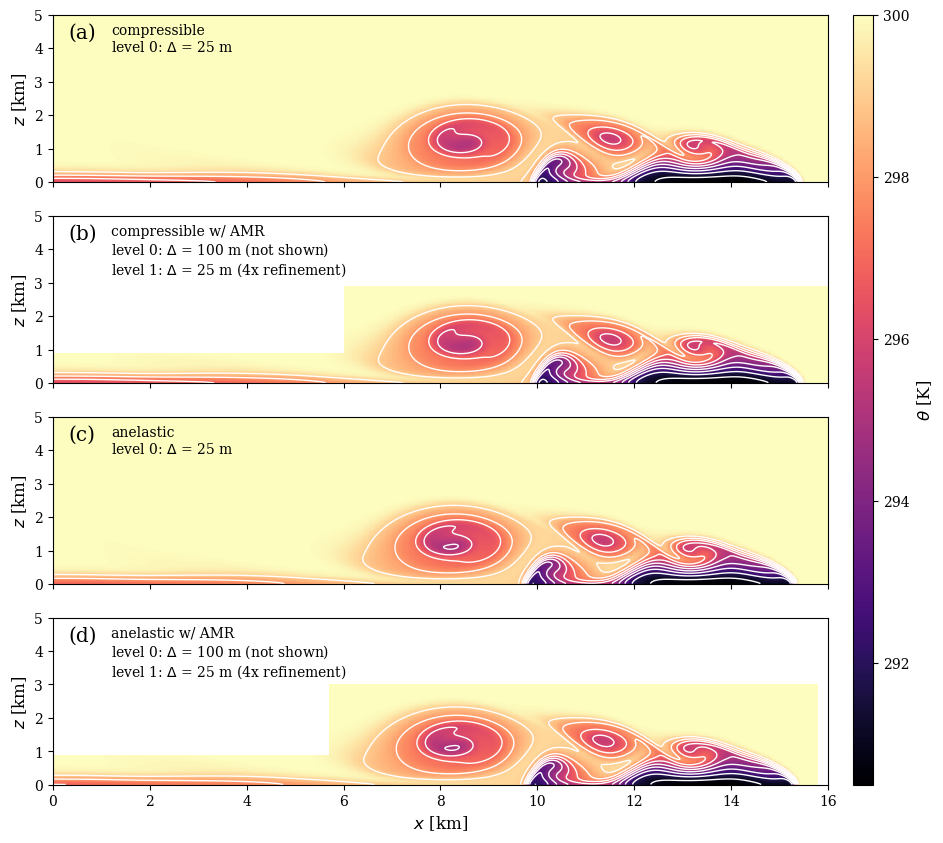

In [7]:
fig,axs = plt.subplots(nrows=4,sharex=True,figsize=(10,4*2.5))
vmin = 290.5 # ref[fld].min().item()
vmax = 300.0 # ref[fld].max().item()
pltlevels = np.arange(291,300)

ax = axs[0]
ds = ref
soln_lev = ds[fld].dropna('x','all').dropna('z','all')
refxplt = soln_lev.x / 1000.
refzplt = soln_lev.z / 1000.
refsolnplt = soln_lev.transpose().squeeze()
cmsh = ax.pcolormesh(refxplt, refzplt, refsolnplt, cmap='magma',vmin=vmin,vmax=vmax)
cont = ax.contour(refxplt, refzplt, refsolnplt, pltlevels, colors='w', linewidths=1)

ax = axs[1]
ds = fac4_comp
for lev in range(ds.sizes['level']):
    if lev==0:
        # only plot level 1
        continue
    soln_lev = ds[fld].isel(level=lev).dropna('x','all').dropna('z','all')
    xplt = soln_lev.x / 1000.
    zplt = soln_lev.z / 1000.
    solnplt = soln_lev.transpose().squeeze()
    cmsh = ax.pcolormesh(xplt, zplt, solnplt, cmap='magma',vmin=vmin,vmax=vmax)
    cont = ax.contour(xplt, zplt, solnplt, pltlevels, colors='w', linewidths=1)

ax = axs[2]
ds = ref_anel
soln_lev = ds[fld].dropna('x','all').dropna('z','all')
refxplt = soln_lev.x / 1000.
refzplt = soln_lev.z / 1000.
refsolnplt = soln_lev.transpose().squeeze()
cmsh = ax.pcolormesh(refxplt, refzplt, refsolnplt, cmap='magma',vmin=vmin,vmax=vmax)
cont = ax.contour(refxplt, refzplt, refsolnplt, pltlevels, colors='w', linewidths=1)

ax = axs[3]
ds = fac4_anel
for lev in range(ds.sizes['level']):
    if lev==0:
        # only plot level 1
        continue
    soln_lev = ds[fld].isel(level=lev).dropna('x','all').dropna('z','all')
    xplt = soln_lev.x / 1000.
    zplt = soln_lev.z / 1000.
    solnplt = soln_lev.transpose().squeeze()
    cmsh = ax.pcolormesh(xplt, zplt, solnplt, cmap='magma',vmin=vmin,vmax=vmax)
    cont = ax.contour(xplt, zplt, solnplt, pltlevels, colors='w', linewidths=1)

# add shared colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.925, 0.11, 0.02, 0.77])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap='magma', norm=norm, orientation='vertical')
cb.set_label('$\\theta$ [K]', fontsize='large')

axs[-1].set_xlim((0,16))
axs[-1].set_xlabel('$x$ [km]', fontsize='large')
for ax in axs:
    ax.set_ylim((0,5))
    ax.set_ylabel('$z$ [km]', fontsize='large')

label_pos = (0.02, 0.95)
axs[0].text(*label_pos, '(a)', transform=axs[0].transAxes, fontsize='x-large', horizontalalignment='left', verticalalignment='top')
axs[1].text(*label_pos, '(b)', transform=axs[1].transAxes, fontsize='x-large', horizontalalignment='left', verticalalignment='top')
axs[2].text(*label_pos, '(c)', transform=axs[2].transAxes, fontsize='x-large', horizontalalignment='left', verticalalignment='top')
axs[3].text(*label_pos, '(d)', transform=axs[3].transAxes, fontsize='x-large', horizontalalignment='left', verticalalignment='top')

desc_text_pos = (0.075, 0.95)
axs[0].text(*desc_text_pos,
            'compressible\nlevel 0: $\\Delta$ = 25 m',
            transform=axs[0].transAxes,
            horizontalalignment='left',
            verticalalignment='top')
axs[1].text(*desc_text_pos,
            'compressible w/ AMR\nlevel 0: $\\Delta$ = 100 m (not shown)\nlevel 1: $\\Delta$ = 25 m (4x refinement)',
            transform=axs[1].transAxes,
            horizontalalignment='left',
            verticalalignment='top')
axs[2].text(*desc_text_pos,
            'anelastic\nlevel 0: $\\Delta$ = 25 m',
            transform=axs[2].transAxes,
            horizontalalignment='left',
            verticalalignment='top')
axs[3].text(*desc_text_pos,
            'anelastic w/ AMR\nlevel 0: $\\Delta$ = 100 m (not shown)\nlevel 1: $\\Delta$ = 25 m (4x refinement)',
            transform=axs[3].transAxes,
            horizontalalignment='left',
            verticalalignment='top')

fig.savefig('density_current_compare_fine_amr.png',bbox_inches='tight',dpi=150)